In [81]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/dynamic-pricing-dataset")

print("Path to dataset files:", path)

# description of the problem
# https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset/data

Path to dataset files: C:\Users\Vitor\.cache\kagglehub\datasets\arashnic\dynamic-pricing-dataset\versions\1


About Dataset
A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

The dataset containing historical ride data has been provided. It includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [88]:
import pandas as pd
import os

# Caminho completo
csv_path = os.path.join(path, "dynamic_pricing.csv")

# Carregar o dataset
df = pd.read_csv(csv_path)
df.head(7)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541


In [89]:
display(df.dtypes)

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [90]:
# Visualizando a classe e o volume de dados
print('Tipo de dado:', type(df) )
print('Dimensão:', df.shape,
      '\nEntradas:', df.shape[0],
      '\nVariáveis:', df.shape[1])

Tipo de dado: <class 'pandas.core.frame.DataFrame'>
Dimensão: (1000, 10) 
Entradas: 1000 
Variáveis: 10


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [93]:
print("\nValores ausentes por coluna:")
missing = df.isnull().sum()
percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Total Missing': missing, '%': percent})
print(missing_df[missing_df['Total Missing'] > 0])


Valores ausentes por coluna:
Empty DataFrame
Columns: [Total Missing, %]
Index: []


In [94]:
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

Number_of_Riders           0.0
Number_of_Drivers          0.0
Location_Category          0.0
Customer_Loyalty_Status    0.0
Number_of_Past_Rides       0.0
Average_Ratings            0.0
Time_of_Booking            0.0
Vehicle_Type               0.0
Expected_Ride_Duration     0.0
Historical_Cost_of_Ride    0.0
dtype: float64

In [95]:
df.describe().round(2)


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,60.37,27.08,50.03,4.26,99.59,372.50
std,23.70,19.07,29.31,0.44,49.17,187.16
min,20.00,5.00,0.00,3.50,10.00,25.99
25%,40.00,11.00,25.00,3.87,59.75,221.37
50%,60.00,22.00,51.00,4.27,102.00,362.02
75%,81.00,38.00,75.00,4.63,143.00,510.50
max,100.00,89.00,100.00,5.00,180.00,836.12


array([[<Axes: title={'center': 'Number_of_Riders'}>,
        <Axes: title={'center': 'Number_of_Drivers'}>],
       [<Axes: title={'center': 'Number_of_Past_Rides'}>,
        <Axes: title={'center': 'Average_Ratings'}>],
       [<Axes: title={'center': 'Expected_Ride_Duration'}>,
        <Axes: title={'center': 'Historical_Cost_of_Ride'}>]],
      dtype=object)

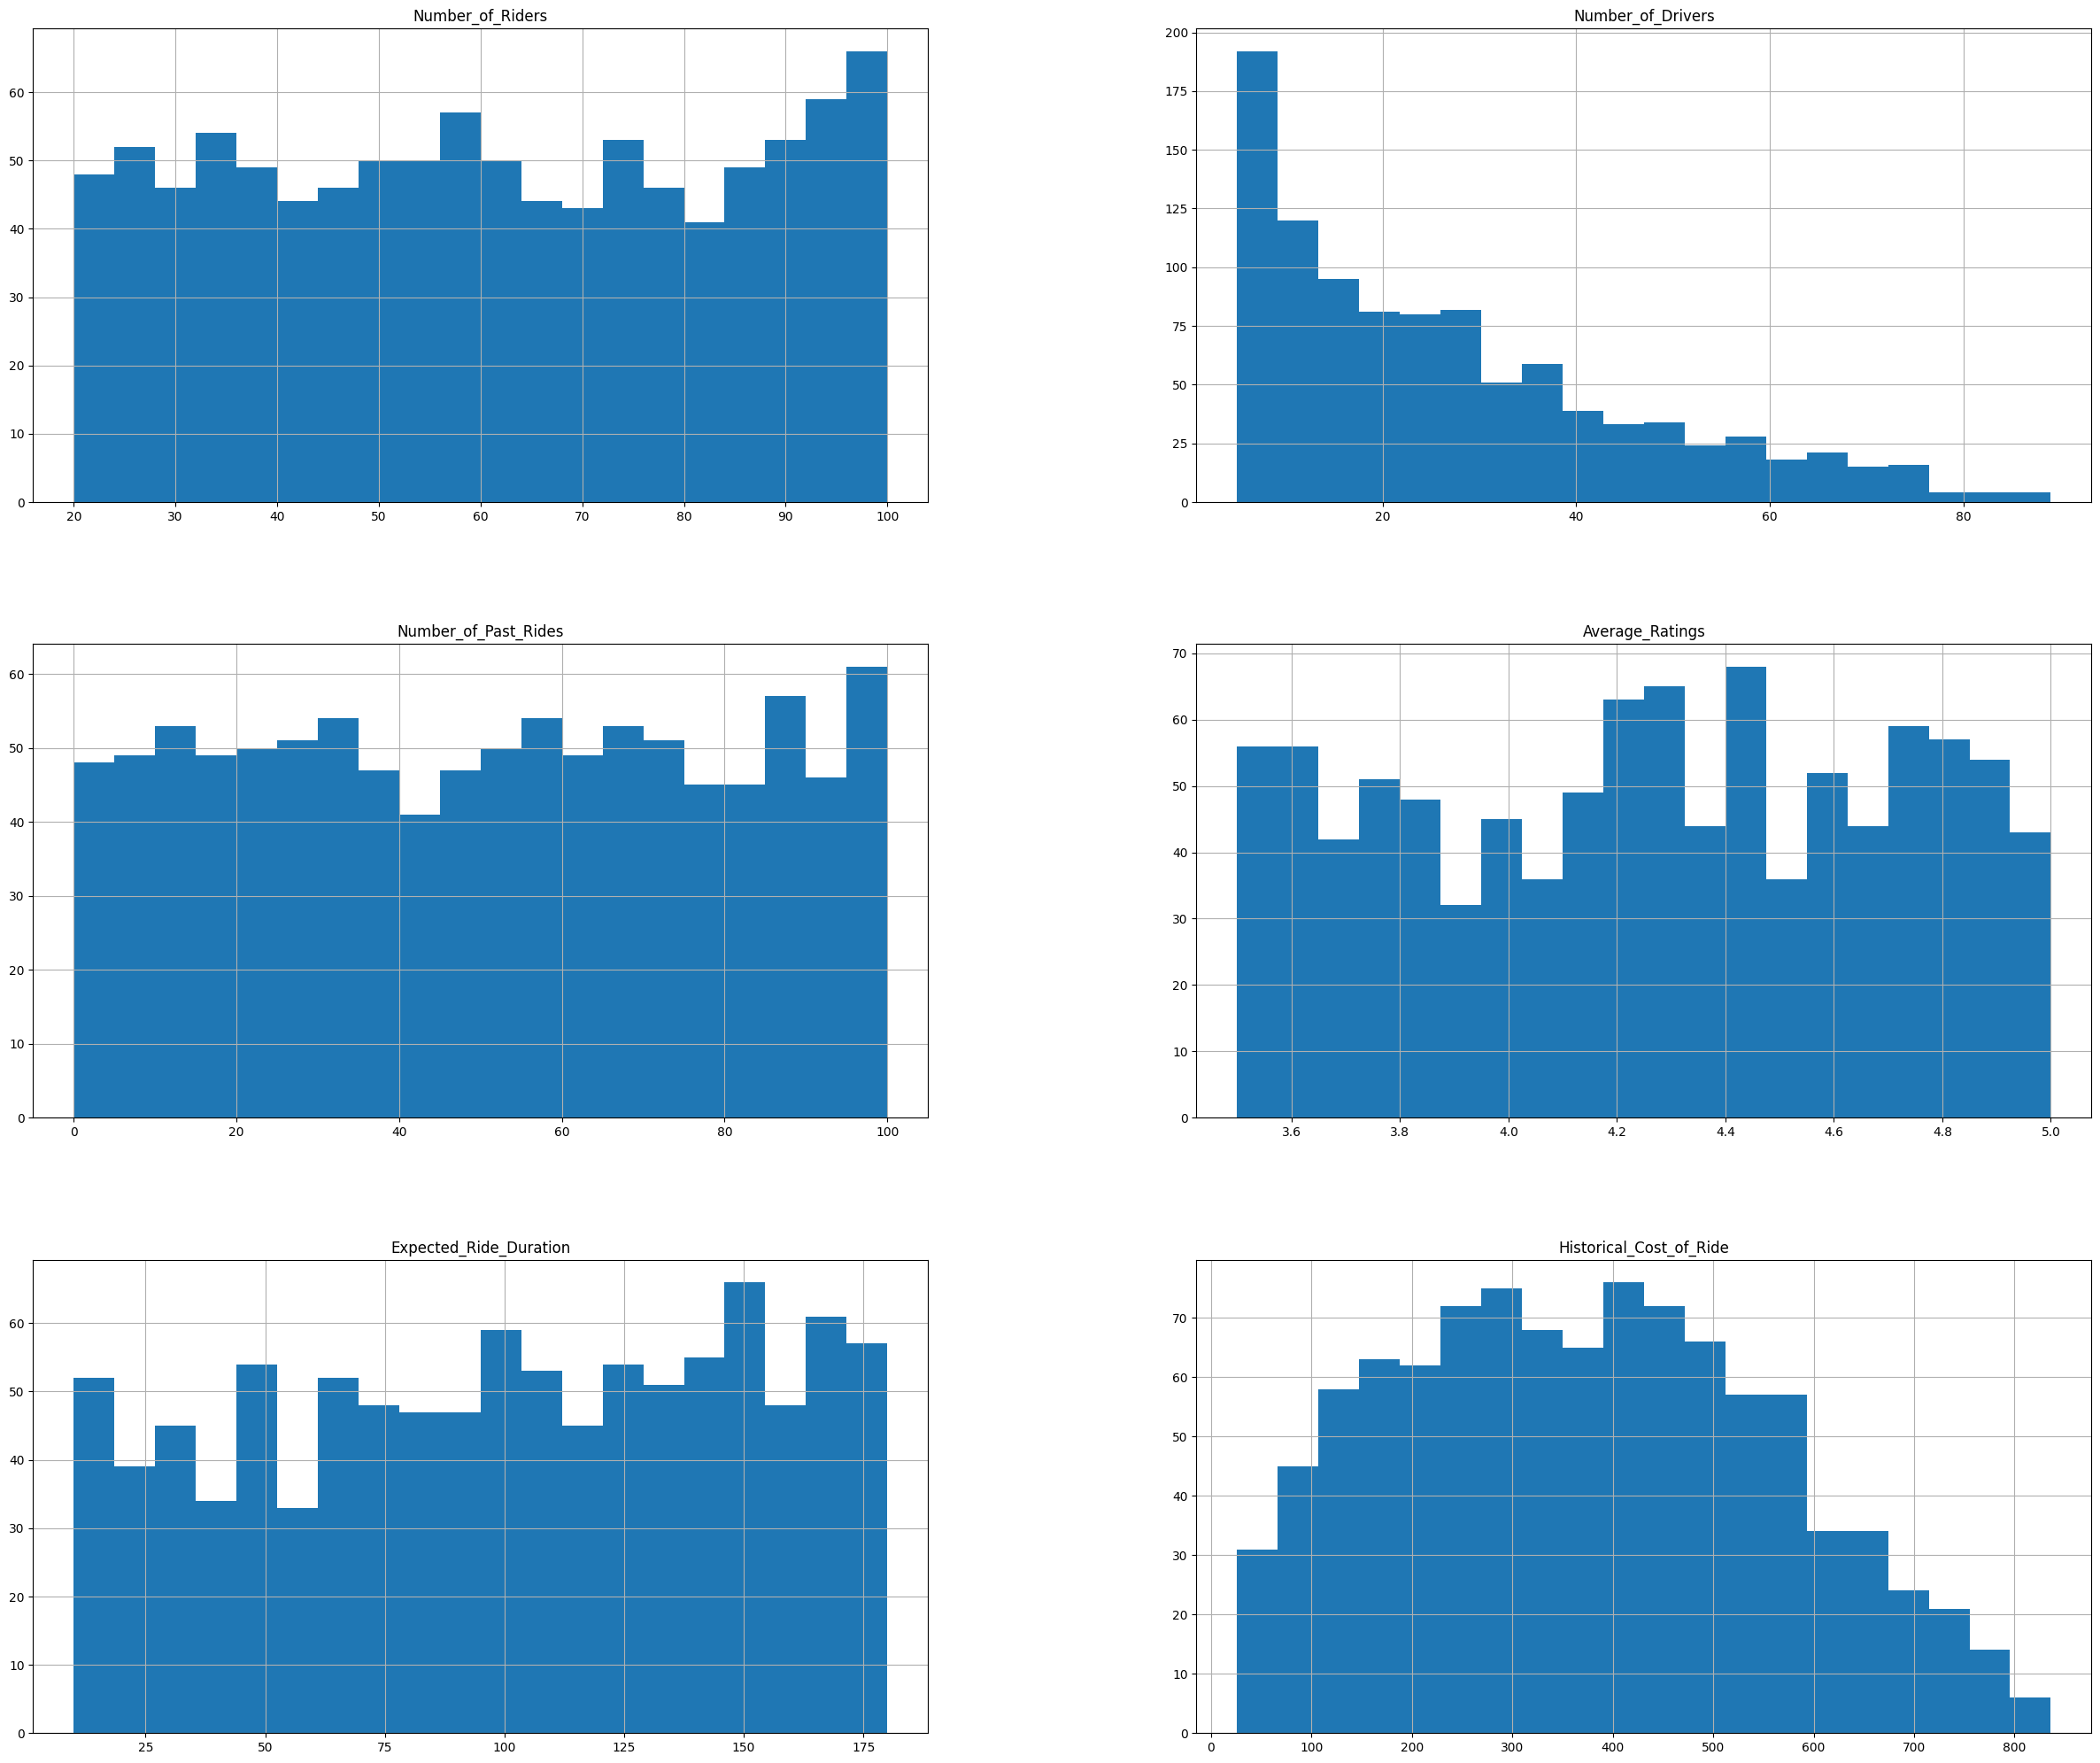

In [107]:
df.hist(bins=20, figsize=(30,25), grid= True)


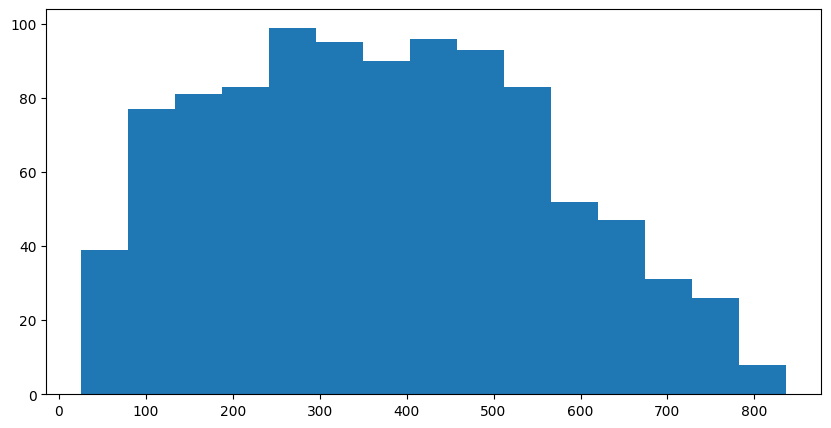

In [ ]:
df.Historical_Cost_of_Ride.hist(bins=15, figsize=(10,5), grid= False);

#teste